# INM430: Principles of Data Science: Lab09

# Networks

## Tutorials and Exercises

### Import necessary libraries

In [1]:
# for basic operations
import pandas as pd
import numpy as np

# for visualisation
import matplotlib.pyplot as plt
%matplotlib inline

# networks
import networkx as nx

# rss file operations
import os
import urllib.request
import xml.etree.ElementTree as ET

### Options and settings

In [2]:
# to see all the columns in tabular view
pd.set_option('display.max_columns', None)

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Exercise 1: Analysis of Networks with NetworkX

#### Create randomized data

In [3]:
# Create a new empty graph
G = nx.Graph()

In [4]:
# Add nodes
#G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
# Add edges
#G.add_edges_from([(1, 2), (1, 3), (1, 4), (4, 5), (3, 4), (2, 3), (2, 5), (3, 5), (2, 4),
#                  (7, 3), (7, 2), (8, 1), (4, 7), (3, 8), (3, 9), (3, 6), (9, 6)])

In [6]:
# Add nodes, edges & weights with a for loop
for n in range(1, 20):
    G.add_nodes_from([n])
    G.add_edges_from([(n, (np.random.randint(1, 20)), {'weight':np.random.randint(0, 5)})])
    G.add_edges_from([(n, (np.random.randint(1, 20)), {'weight':np.random.randint(0, 5)})])

In [7]:
# Find the node with highest degree centrality
nx.degree_centrality(G)

{1: 0.38888888888888884,
 2: 0.2222222222222222,
 13: 0.3333333333333333,
 15: 0.2777777777777778,
 3: 0.2222222222222222,
 9: 0.16666666666666666,
 11: 0.2222222222222222,
 4: 0.2222222222222222,
 10: 0.16666666666666666,
 16: 0.16666666666666666,
 5: 0.16666666666666666,
 12: 0.2777777777777778,
 8: 0.16666666666666666,
 6: 0.16666666666666666,
 7: 0.16666666666666666,
 18: 0.16666666666666666,
 14: 0.16666666666666666,
 17: 0.16666666666666666,
 19: 0.16666666666666666}

##### Comments

Node number 9 has the highest degree centrality.

In [8]:
# Find the node with highest betweenness centrality
nx.betweenness_centrality(G, k = None, normalized = True, weight = None, endpoints = False, seed = None)

{1: 0.15511982570806102,
 2: 0.0533769063180828,
 13: 0.18627450980392157,
 15: 0.045206971677559916,
 3: 0.08921568627450979,
 9: 0.04738562091503268,
 11: 0.08540305010893247,
 4: 0.12799564270152505,
 10: 0.06775599128540305,
 16: 0.05882352941176472,
 5: 0.04727668845315904,
 12: 0.07265795206971677,
 8: 0.06470588235294117,
 6: 0.05501089324618736,
 7: 0.03507625272331154,
 18: 0.06884531590413943,
 14: 0.022875816993464054,
 17: 0.042483660130718956,
 19: 0.04052287581699346}

##### Comments

Node number 9 has the highest betweenness centrality.

In [9]:
# After adding weights, find the betweenness centrality once more but this time give the edge weights as parameters
#nx.betweenness_centrality(G, k = None, normalized = True, weight = None, endpoints = False, seed = None)

##### Comments

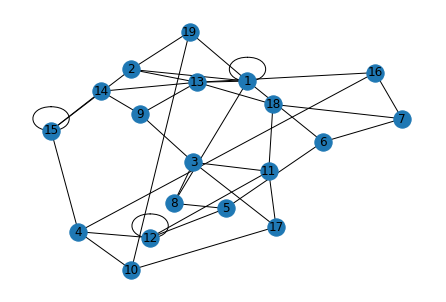

In [10]:
# Lay out the graph and store the node positions in positions
positions = nx.spring_layout(G)

# options
#options = {'node_color': 'black','node_size': 100,'width': 1}

# Draw the nodes and labels (separately) as those positions
nx.draw(G, pos = positions,
       # **options
       )
nx.draw_networkx_labels(G, pos = positions)
plt.draw()

#### Using the graphml file

##### Part 1: Load the GraphML file

In [11]:
# Load the GraphML file into a networkx graph
coauthorshipG = nx.read_graphml("netScience.graphml")

##### Part 2: Find the connected components

In [12]:
# Find the connected components
connected = nx.number_connected_components(coauthorshipG)
connected

396

##### Part 3: Find the largest connected component subgraph

In [13]:
# Find the largest connected component subgraph
# nx.connected_component_subgraphs(coauthorshipG) # depreciated and removed from the latest version of networkx

# Use a solution found on:
# https://github.com/rkistner/chinese-postman/issues/21

def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
        
coauthorshipSG = connected_component_subgraphs(coauthorshipG)

In [14]:
coauthorshipSG

<generator object connected_component_subgraphs at 0x7f96a5163f20>

In [15]:
coauthorshipSGL = max(coauthorshipSG, key = len)

In [16]:
coauthorshipSGL

In [17]:
# Count the number of authors (nodes) and relations (edges)
print('The number of authors in the largest connected component is:', nx.number_of_nodes(coauthorshipSGL))
print('The number of relations in the largest connected component is:', nx.number_of_edges(coauthorshipSGL))

The number of authors in the largest connected component is: 379
The number of relations in the largest connected component is: 914


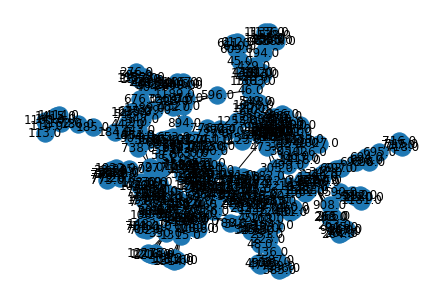

In [18]:
# Draw this subgraph
positions = nx.spring_layout(coauthorshipSGL)

nx.draw(coauthorshipSGL, pos = positions)
nx.draw_networkx_labels(coauthorshipSGL, pos = positions)
plt.draw()


##### Part 4: Find the most central author

In [19]:
# Find the most central author
coauthorshipBC = nx.betweenness_centrality(coauthorshipG, k = None, normalized = True, weight = None, endpoints = False, seed = None)

# finding the max key of the dictionary
max_key = max(coauthorshipBC, key = coauthorshipBC.get)
max_key

'78.0'

##### Part 5: Find the average clustering coefficient of all the connected component subgraphs

In [20]:
# store all subgraphs in one list
sub_graphs = list(connected_component_subgraphs(coauthorshipG)) # function we defined above

In [21]:
len(sub_graphs)

396

In [22]:
# create an empty list for average clustering coefficients
coefficients = []

# iterate through each subgraph and calculate clustering coefficient for all nodes in each cluster
for i in sub_graphs:
    coef = nx.clustering(i)
    coefficients.append(coef)

In [23]:
len(coefficients)

396

##### Comments

The list **coefficients** in this case is a list of dictionaries. The dictionaries gives as the clustering coefficient of every individual nodes in that specific cluster. We will need to calculate the average clustering coefficient inside these dictionaries.

https://www.cl.cam.ac.uk/teaching/1314/L109/tutorial.pdf

In [24]:
# define an empty list to store average coefficients of all clusters
average_coefficients = []

# define a loop to calculate average correlation coefficient in every dictionary
for i in coefficients:
    avg_coef = sum(i.values()) / len(i)
    average_coefficients.append(avg_coef)

In [25]:
len(average_coefficients)

396

##### Part 6: Find some tightly connected subgraphs

In [26]:
# look at the first 10 elements of the list
average_coefficients[0:10]

[0.5833333333333334,
 1.0,
 0.5958333333333333,
 0.9285714285714286,
 1.0,
 0.0,
 1.0,
 0.7619047619047619,
 0.0,
 1.0]

In [27]:
# ignore 1s (since these clusters tend to be very small)
# find second largest and draw that subgraph - (every subgraph is a cluster)
# index 3 looks like it is larger than others but not 1, let's select that
sub_graphs[3]

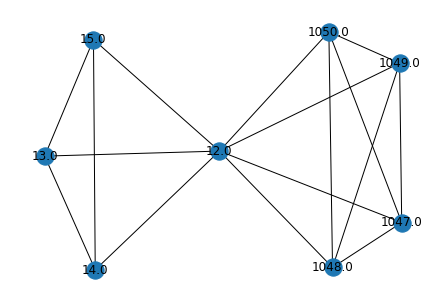

In [28]:
# draw the network
positions = nx.spring_layout(sub_graphs[3])

nx.draw(sub_graphs[3], pos = positions)
nx.draw_networkx_labels(sub_graphs[3], pos = positions)
plt.draw() 

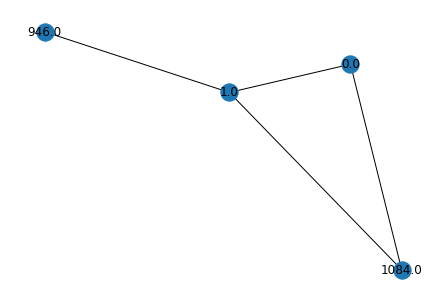

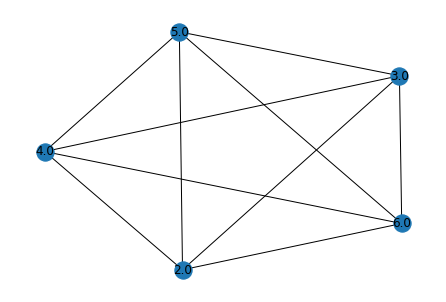

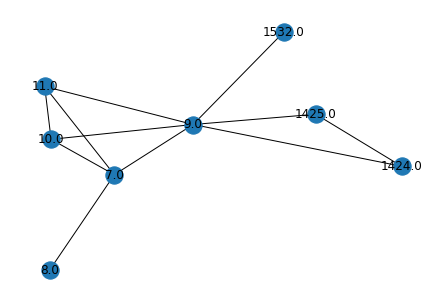

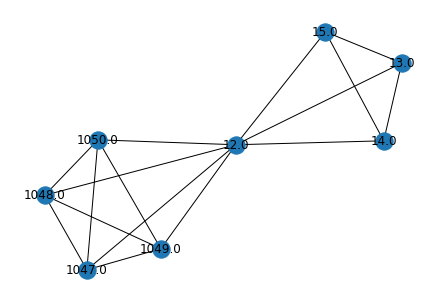

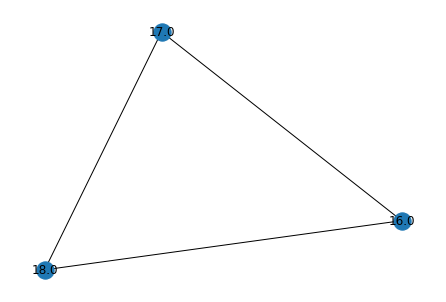

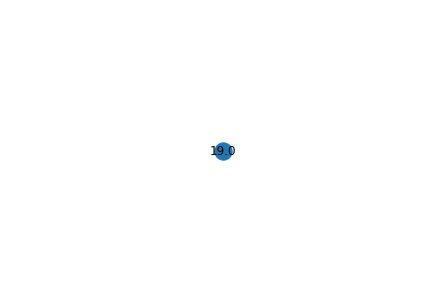

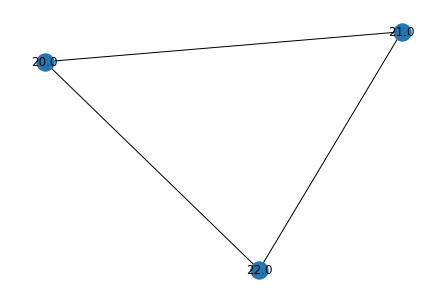

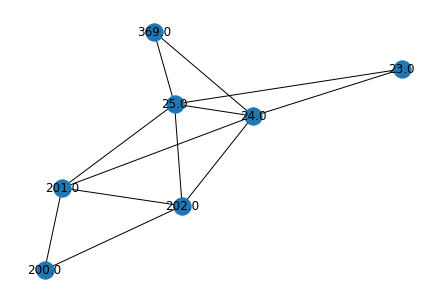

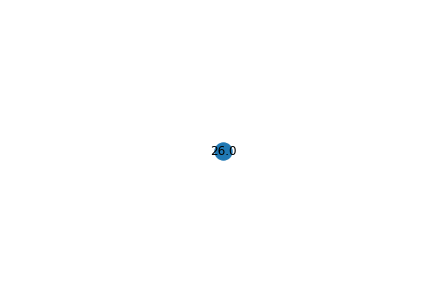

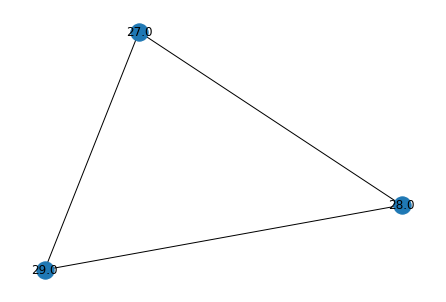

In [29]:
# draw the first 10 networks in the sub_graphs list
for i in sub_graphs[0:10]:
    positions = nx.spring_layout(i)
    nx.draw(i, pos = positions)
    nx.draw_networkx_labels(i, pos = positions)
    plt.draw() 
    plt.show()

##### Part 7: Try drawing the whole graph

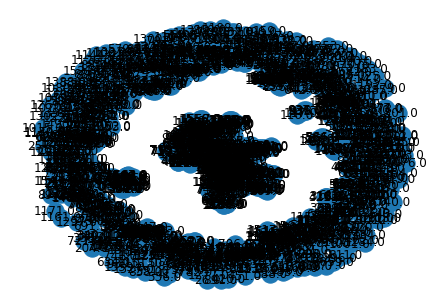

In [30]:
positions = nx.spring_layout(coauthorshipG)

nx.draw(coauthorshipG, pos = positions)
nx.draw_networkx_labels(coauthorshipG, pos = positions)
plt.draw() 

### Exercise 2: Analysis of Les Misérables with NetworkX

#### Copy the code required to process the book from Week08

In [31]:
# libraries
from urllib.request import urlopen
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# create a stop words list
stop_words = (stopwords.words('english'))

# define punctuation string
punctuations = '''!()-,[]{};:'”“"’`\,,<>./?@$%^&*_~'''

# define extra words list
extra_words = ['I', 'The', 'one', 'He', 'It', 'said', '...', 'would']

# define the URL and store the book in the url to a variable
target_url1 = 'http://www.gutenberg.org/files/135/135-0.txt'
book_raw1 = urlopen(target_url1).read().decode('utf-8')

# tokenize the string - this will transform the whole string into words
word_tokens1 = word_tokenize(book_raw1)

# remove stop words and punctuations
swr_word_tokens1 = [word for word in word_tokens1 if not word in stop_words]
eswr_word_tokens1 = [word for word in swr_word_tokens1 if not word in extra_words]
pswr_word_tokens1 = [word for word in eswr_word_tokens1 if not word in punctuations]

In [32]:
character_list = ['Myriel','Bishop','Baptistine','Magloire','Cravatte','Valjean','Gervais','Fantine','Tholomyès'
                  ,'Blachevelle','Dahlia','Fameuil','Favourite','Listolier','Zéphine','Cosette','Thénardier',
                  'Éponine','Azelma','Javert','Fauchelevent','Bamatabois','Champmathieu',
                  'Brevet','Simplice','Chenildieu','Cochepaille','Innocente','Reverend','Ascension','Crucifixion',
                  'Gavroche','Magnon',
                  'Gillenormand','Marius','Colonel','Mabeuf','Enjolras','Combeferre','Prouvaire',
                 'Feuilly','Courfeyrac','Bahorel','Lesgle','Joly','Grantaire','Patron-Minette','Brujon',
                 'Toussaint'] 
numCharacters  = len(character_list)

There is a **huge** number of caveats of this part of the analysis. For instance:
- the name *Thénardier* is taken as a single instance, whilst it can cover either Madame or Monsieur Thénardier.
- The Bishop Myriel is sometimes referred as Myriel and sometimes as Bishop
- *Petit Gervais* and *St Gervais* will be confused as well. 

A more sophisticated analysis would distinguish some of these by taking bi-grams (pairs of words) and distinguishing between these. More subtle caveats:

- The Bishop or any other character may be referred in a thought and it does not mean it was present in a scene.

Those distinctions are outside the scope of the present notebook, which aims to illustrate the process of extraction of interactions between characters from a book.

Notice that the character map that was derived by Knuth has been criticised:  https://lesmiserables.mla.hcommons.org/

The number of characters is the following

In [33]:
numCharacters

49

A dictionary of the characters will be needed later on.

In [34]:
character_map = {}
for i in range(numCharacters):
    character_map[i] = character_list[i]

In [35]:
#character_map

The interactions  between characters will be obtained in the following way:
Define *one* interaction between a pair of characters (e.g. Javert,Cosette), if the two characters appear within a certain distance (in number of words) of each other. For that we need the occurrences of each of the characters and the positions of each occurrence.

Again, this is primitive and has many caveats, for instance, the appearance could be in separate chapters, but more sophisticated analysis can be applied later on.

In [36]:
k = 0;
numOccurrences = pd.Series(range(numCharacters))
for character in character_list:
    numOccurrences[k] = pswr_word_tokens1.count(character)
    k = k+1

Now we can create an nd array with zeros for the positions of each character

In [37]:
positions_characters = [] 
for i in range(len(numOccurrences)):
    a = np.zeros(numOccurrences[i])  
    positions_characters.append(a)            

Now, iterate over every character, find the positions and store in a temp array that will be then used on the big array


In [38]:
numTokens = len(pswr_word_tokens1)

In [39]:
for j in range(numCharacters):
    positions_current   = []
    for i in range(numTokens):
        if pswr_word_tokens1[i] == character_list[j]:
            #print(i)
            positions_current.append(i)
    positions_characters[j][:] = positions_current   

We have all the positions for every occurrence of each character, for instance for  Myriel (the Bishop, but by name only), location 0 we have the following positions:

In [40]:
positions_characters[0]

array([ 2935.,  2978.,  3008.,  3042.,  3061.,  3119.,  3182.,  3202.,
        3216.,  3223.,  3227.,  3284.,  3417.,  3772.,  3790.,  3805.,
        3905.,  4261.,  4295.,  6082.,  6189.,  8511.,  8520., 10272.,
       12167., 12189., 12212., 36416.])

We can now measure distances between character appearances, iterate between pairs of characters (i,j) and then between the locations (loc_i,loc_j) and calculate the distance. If it is less than 500 words, the add, if not discard. The 500 is arbitrary, and interesting analysis would be to modify this value and see how the results change.
The interactions will be recorded in a symmetrical way.

In [41]:
interactions_characters = np.zeros((numCharacters,numCharacters))
for i in range(numCharacters - 1):
    for j in range(i + 1,numCharacters):
        # A pair of characters (i,j) has been selected, 
        # now iterate over their locations and find the distances
        #print(i,j)
        for loc_i in range(numOccurrences[i]):
            for loc_j in range(numOccurrences[j]):
                # find distance
                dist = abs(positions_characters[i][loc_i]-positions_characters[j][loc_j])
                #if distance is small, then record interaction
                if (dist < 500):
                    interactions_characters[i,j] = interactions_characters[i,j]+1
                    interactions_characters[j,i] = interactions_characters[j,i]+1
                #print(i,j, positions_characters[i][loc_i],positions_characters[j][loc_j])
                #print(i,j, loc_i,loc_j,dist)
        
#positions_characters
#interactions_characters

In [42]:
interactions_characters

array([[  0., 281.,  78., ...,   0.,   0.,   0.],
       [281.,   0., 372., ...,   0.,   0.,   3.],
       [ 78., 372.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   5.,   0.],
       [  0.,   0.,   0., ...,   5.,   0.,   4.],
       [  0.,   3.,   0., ...,   0.,   4.,   0.]])

#### The transformation from that adjacency matrix to a network

In [43]:
G1 = nx.from_numpy_matrix(interactions_characters) 

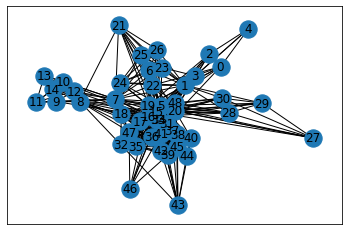

In [44]:
nx.draw_networkx(G1)

#### Relabel the nodes

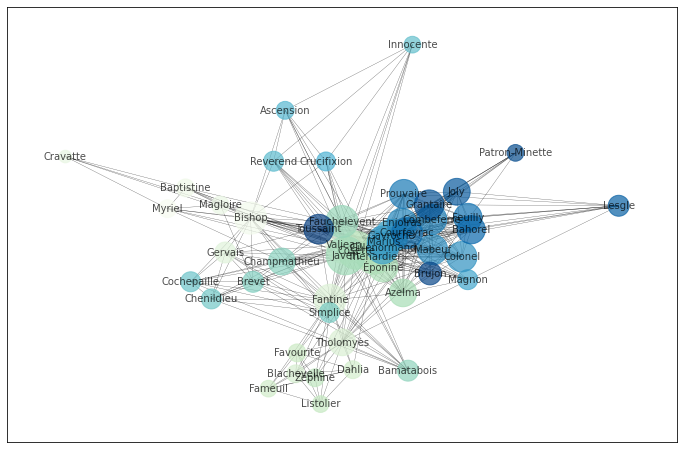

In [45]:
kdeg = G1.degree()
fig = plt.figure(figsize = (12, 8))
ax1 = plt.subplot(111)
H1 = nx.relabel_nodes(G1, character_map)

nx.draw_networkx(H1, node_color = range(numCharacters), font_color = 'black', width = 0.3, alpha = 0.7, 
                 font_size = 10, cmap = plt.cm.GnBu, node_size =[40*val for (node, val) in kdeg])

#### Change the weights of the matrix

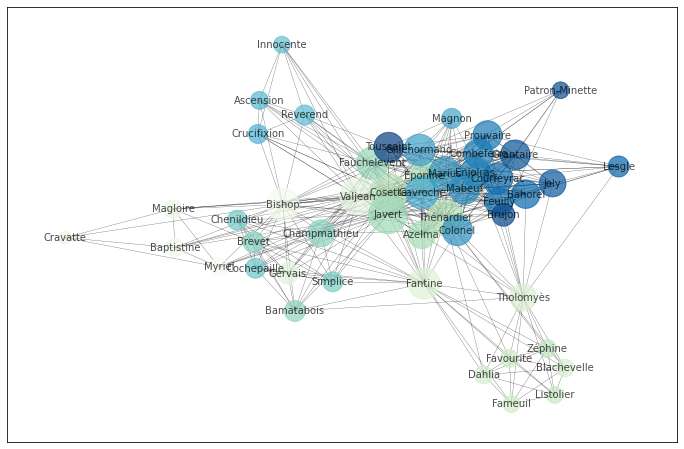

In [46]:
fig = plt.figure(figsize = (12, 8))
ax1 = plt.subplot(111)
H2 = nx.relabel_nodes(nx.from_numpy_matrix(np.log(1 + interactions_characters)), character_map)

nx.draw_networkx(H2, node_color = range(numCharacters), font_color = 'black', width = 0.3, alpha = 0.7, 
                 font_size = 10, cmap = plt.cm.GnBu, node_size =[40*val for (node, val) in kdeg])

#### Circular graphs

In [47]:
degree_centrality = nx.degree_centrality(H1)
nx.set_node_attributes(H1, degree_centrality, 'dc')

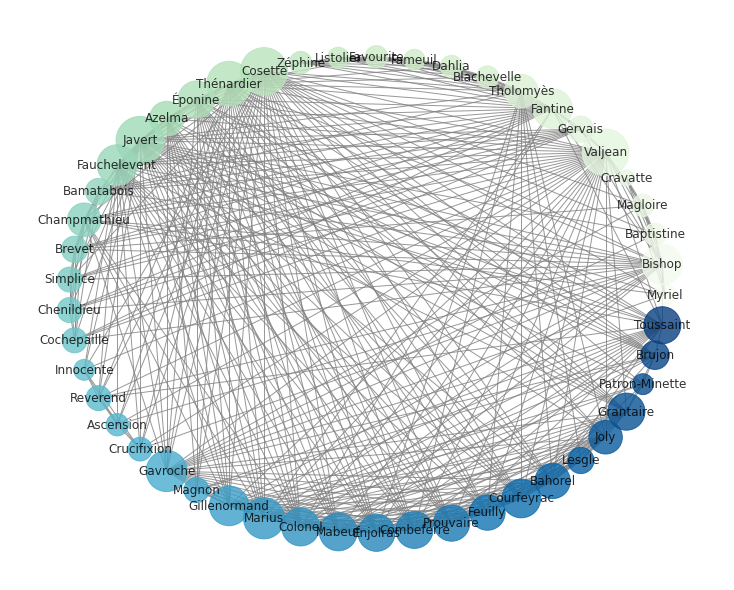

In [48]:
fig = plt.figure(figsize = (10, 8))
nx.draw_circular(H1, node_color = range(numCharacters), font_color = 'black', alpha = 0.8, edge_color = 'gray',
                 font_size = 12, with_labels = True, cmap = plt.cm.GnBu,
                 node_size = [3000*v for v in degree_centrality.values()])

#### Change node color so that it is proportional to the centrality

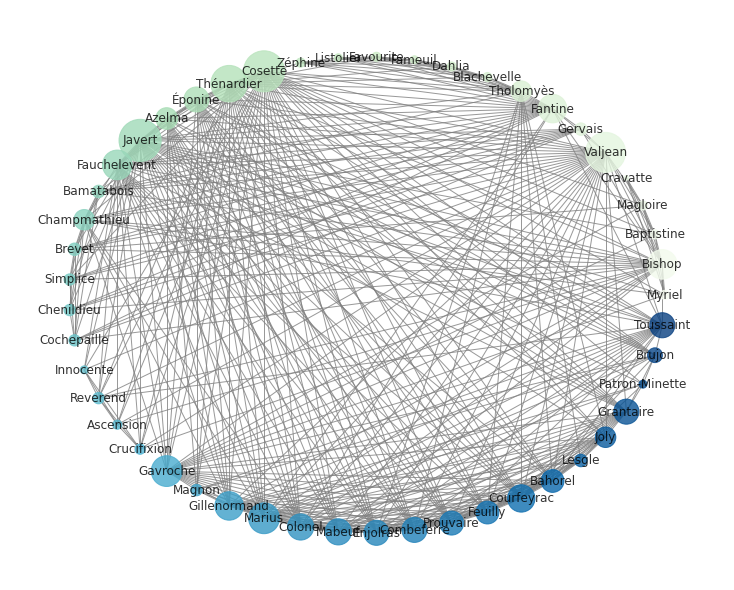

In [49]:
fig = plt.figure(figsize = (10, 8))
nx.draw_circular(H1, node_color = range(numCharacters), font_color = 'black', alpha = 0.8, edge_color = 'gray',
                 font_size = 12, with_labels = True, cmap = plt.cm.GnBu,
                 node_size = [3000*(v**2) for v in degree_centrality.values()])

#### Coloring based on centrality values

In [50]:
centralityValues = [v for v in degree_centrality.values()]

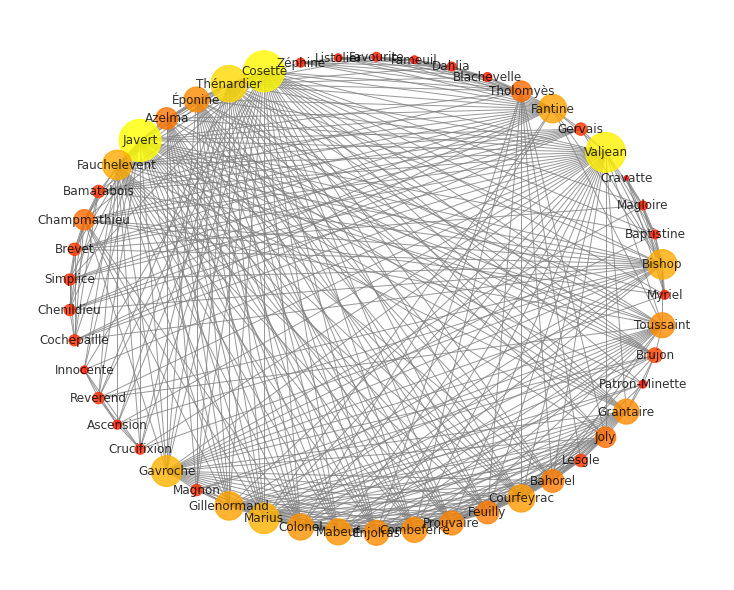

In [51]:
fig = plt.figure(figsize = (10, 8))
nx.draw_circular(H2, node_color = centralityValues, font_color = 'black', alpha = 0.8, edge_color = 'gray', 
                 #edge_weight = 5,
                 font_size = 12, with_labels = True, cmap = plt.cm.autumn,
                 node_size = [3000*(v**2) for v in degree_centrality.values()])

#### Cliques

In [52]:
cliques = list(nx.find_cliques(H1))
cl2 = list(cliques)
len(cl2)

44

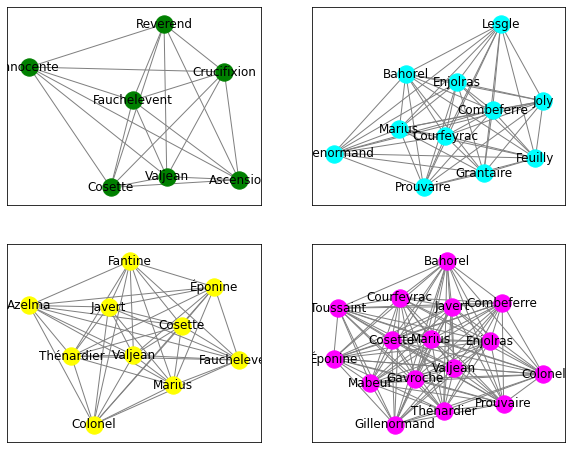

In [53]:
fig = plt.figure(figsize = (10, 8))
ax1 = fig.add_subplot(221)
nx.draw_networkx(H2.subgraph(cl2[5]), font_size = 12, font_color = 'black', node_color = 'green', edge_color = 'gray')
ax1 = fig.add_subplot(222)
nx.draw_networkx(H2.subgraph(cl2[0]), font_size = 12, font_color = 'black', node_color = 'cyan', edge_color = 'gray')
ax1 = fig.add_subplot(223)
nx.draw_networkx(H2.subgraph(cl2[24]), font_size = 12, font_color = 'black', node_color = 'yellow', edge_color = 'gray')
ax1 = fig.add_subplot(224)
nx.draw_networkx(H2.subgraph(cl2[34]), font_size = 12, font_color = 'black', node_color = '#ff00ff', edge_color = 'gray')

#### Min/Max Spannintg Tree

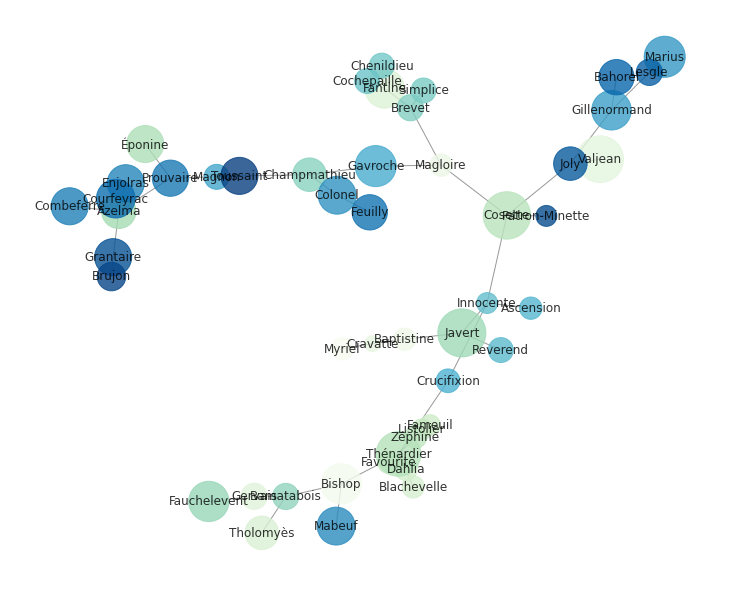

In [54]:
T = nx.minimum_spanning_tree(H1)
fig = plt.figure(figsize = (10, 8))
nx.draw_spring(T, node_color = range(numCharacters), font_color = 'black', alpha = 0.8, edge_color = 'gray',
               font_size = 12, with_labels = True, cmap = plt.cm.GnBu,
               node_size = [3000*v for v in degree_centrality.values()])

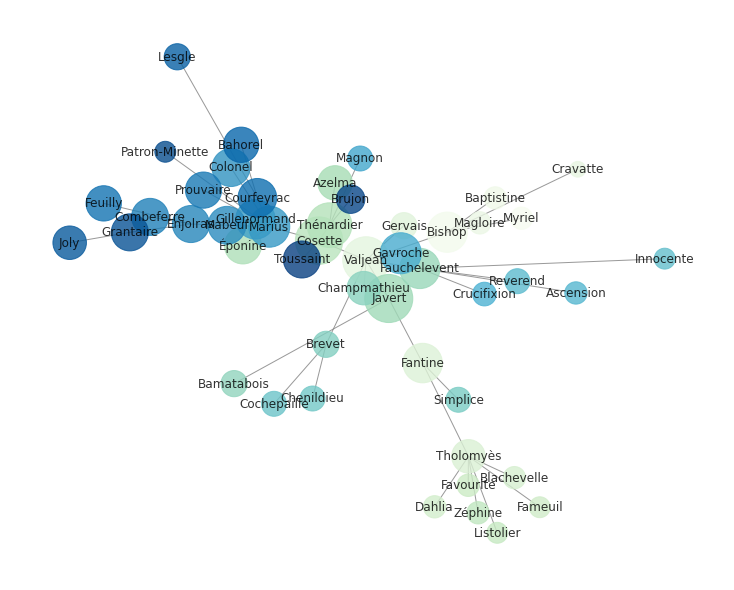

In [55]:
T = nx.maximum_spanning_tree(H1)
fig = plt.figure(figsize = (10, 8))
nx.draw_spring(T, node_color = range(numCharacters), font_color = 'black', alpha = 0.8, edge_color = 'gray',
               font_size = 12, with_labels = True, cmap = plt.cm.GnBu,
               node_size = [3000*v for v in degree_centrality.values()])

### Optional Extra: Graph analysis with Gephi

This part is really optional, we don't have Gephi installed on our City computers, so you need a computer where you can install this. You can install on the lab machines but they will not be synced the next time you log in.

This task is meant to give you some experience with Gephi and observe that some of the analysis you've done can be done through this interactive system.

- Get the Gephi installation from the Gephi page.
- Once installed, load the GraphML file to the system (which can be found here).
- Observe the different measure available in Gephi and compute graph related measures.
- Try to modify the layout that is used in the visualisation and try to improve the results through filtering.

### Optional Extra 2 : Parsing XML files

#### Read the RSS to a file

In [56]:
feed = urllib.request.urlopen("http://feeds.bbci.co.uk/news/world/rss.xml?edition=uk")

In [57]:
feed

#### Parse it to get the root

In [58]:
tree = ET.parse(feed)
root = tree.getroot()

In [59]:
print ("Root node is: ", root.tag, " with attributes: ", root.attrib)

Root node is:  rss  with attributes:  {'version': '2.0'}


In [60]:
root

<Element 'rss' at 0x7f96a9cfa040>

#### Look at the children of the root and investigate some of these like the title or the language

In [61]:
list(root[0].getchildren())

[<Element 'title' at 0x7f96a9cfa0e0>,
 <Element 'description' at 0x7f96a9cfa180>,
 <Element 'link' at 0x7f96a9cfa220>,
 <Element 'image' at 0x7f96a9cfa2c0>,
 <Element 'generator' at 0x7f96a9cfa4a0>,
 <Element 'lastBuildDate' at 0x7f96a9cfa4f0>,
 <Element 'copyright' at 0x7f96a9cfa590>,
 <Element 'language' at 0x7f96a9cfa5e0>,
 <Element 'ttl' at 0x7f96a9cfa630>,
 <Element 'item' at 0x7f96a9cfa680>,
 <Element 'item' at 0x7f96a9cfa900>,
 <Element 'item' at 0x7f96a9cfab80>,
 <Element 'item' at 0x7f96a9cfae00>,
 <Element 'item' at 0x7f96a9cee0e0>,
 <Element 'item' at 0x7f96a9cee360>,
 <Element 'item' at 0x7f96a9cee5e0>,
 <Element 'item' at 0x7f96a9cee860>,
 <Element 'item' at 0x7f96a9ceeae0>,
 <Element 'item' at 0x7f96a9ceed60>,
 <Element 'item' at 0x7f96a9cf9040>,
 <Element 'item' at 0x7f96a9cf92c0>,
 <Element 'item' at 0x7f96a9cf9540>,
 <Element 'item' at 0x7f96a9cf97c0>,
 <Element 'item' at 0x7f96a9cf9a40>,
 <Element 'item' at 0x7f96a9cf9cc0>,
 <Element 'item' at 0x7f96a9cf9f40>,
 <Eleme

Notice that after the first ones, you will have a long list of **'item'**. We will explore these ones next.

In [62]:
# The root will contain the channel itself (with those items), you can select the channel as:
channelNode = root[0]

In [63]:
channelNode

<Element 'channel' at 0x7f96a9cfa090>

#### Iterate through item feeds

In [75]:
dateList = []
titleList = []

for itemNode in channelNode.iter('item'):
    dateText = itemNode.find('pubDate').text
    dateList.append(dateText)
    titleText = itemNode.find('title').text
    titleList.append(titleText)

In [76]:
dateList

['Sat, 04 Dec 2021 08:53:34 GMT',
 'Sat, 04 Dec 2021 06:06:06 GMT',
 'Fri, 03 Dec 2021 17:34:06 GMT',
 'Fri, 03 Dec 2021 22:34:22 GMT',
 'Sat, 04 Dec 2021 00:47:48 GMT',
 'Sat, 04 Dec 2021 02:03:32 GMT',
 'Sat, 04 Dec 2021 09:34:37 GMT',
 'Fri, 03 Dec 2021 17:40:58 GMT',
 'Fri, 03 Dec 2021 17:28:03 GMT',
 'Fri, 03 Dec 2021 08:39:36 GMT',
 'Fri, 03 Dec 2021 00:25:37 GMT',
 'Sat, 04 Dec 2021 02:44:21 GMT',
 'Sat, 04 Dec 2021 00:32:42 GMT',
 'Sat, 04 Dec 2021 00:41:35 GMT',
 'Sat, 04 Dec 2021 00:43:33 GMT',
 'Fri, 03 Dec 2021 13:43:37 GMT',
 'Fri, 03 Dec 2021 05:35:48 GMT',
 'Fri, 03 Dec 2021 00:03:23 GMT',
 'Fri, 03 Dec 2021 00:11:18 GMT',
 'Sat, 04 Dec 2021 00:10:23 GMT',
 'Fri, 03 Dec 2021 00:31:06 GMT',
 'Thu, 02 Dec 2021 23:07:08 GMT',
 'Fri, 03 Dec 2021 00:12:34 GMT',
 'Thu, 02 Dec 2021 18:26:31 GMT']

In [77]:
titleList

["Michigan school shooting: Suspect's parents arrested in Detroit",
 "Russia Ukraine: Biden warns Russia against Ukraine 'red lines'",
 "Covid: Don't panic about Omicron variant, WHO says",
 'MH370: Could missing Malaysian Airlines plane finally be found?',
 'Ready for power: Team Scholz promises a new Germany',
 'Bolsonaro: Brazilian Supreme Court opens investigation into vaccine comments',
 'Rare turtle washes up 4,000 miles from home',
 'Italian man tries to dodge Covid jab using fake arm',
 'Ethiopia closes schools to boost civil war effort',
 "Thailand: Newspaper rebuked over 'hunts Africans' headline",
 'Kerala: The granny who learnt to read and write at 104',
 'Mali: Dozens of civilians killed after militants attack bus',
 'Parag Agrawal: Why Indian-born CEOs dominate Silicon Valley',
 'Why Ugandan troops have entered DR Congo - again',
 'Saudi Arabia Grand Prix: A race for equal rights',
 'South Africa battles Omicron fear and vaccine myths',
 "The 'kind heart' who gave an Afgh

#### List all the news that have been posted yesterday